In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
from lsst.sims.maf.utils import m52snr
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.plots as plots

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.utils import equatorialFromGalactic, hpid2RaDec, _healbin, healbin
from lsst.utils import getPackageDir
from mafContrib import MicrolensingMetric, microlensingSlicer, microlensing_amplification
import healpy as hp
import os

In [2]:
# generate a slicer with 10000 microlensing events
slicer = microlensingSlicer(min_crossing_time=1, max_crossing_time=10, n_events=10000)

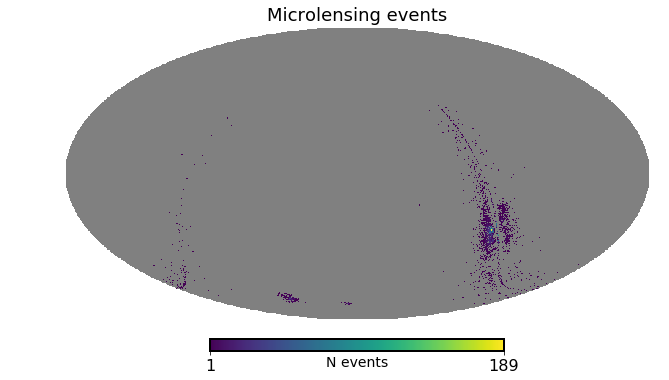

In [3]:
# We can reach into the slicer and plot up the distribution of things
dist = _healbin(slicer.slicePoints['ra'], slicer.slicePoints['dec'], slicer.slicePoints['dec']*0+1, reduceFunc=np.sum)
hp.mollview(dist, title='Microlensing events', unit='N events')

In [4]:
runName = 'baseline_v1.4_10yrs' 
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

metric = MicrolensingMetric()
sql = ''
# Don't want to try and plot N individual points, 
plotDict = {'reduceFunc': np.sum, 'nside': 128}
plotFuncs = [plots.HealpixSkyMap()]
summaryMetrics=[metrics.MeanMetric()]
bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)

Querying database SummaryAllProps with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'night', 'fieldRA'].
Found 2180589 visits
Running:  ['baseline_v1_4_10yrs_MicrolensingMetric_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.


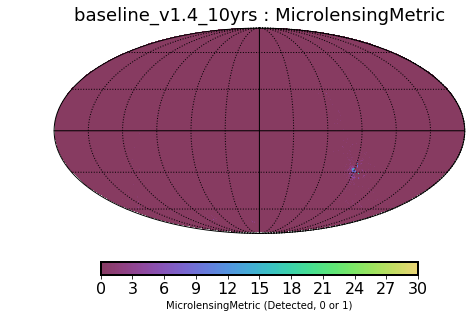

In [5]:
bgroup = metricBundles.MetricBundleGroup([bundle], opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [6]:
print('fraction of events detected pre-peak=', bundle.summaryValues['Mean'])

fraction of events detected pre-peak= 0.1572257806244996


In [7]:
# We can reach into the slicer and look at the light curve of one
slicer.slicePoints

{'sid': array([   0,    1,    2, ..., 9997, 9998, 9999]),
 'ra': array([4.67507783, 0.22887451, 4.70839448, ..., 4.83864435, 4.78704192,
        4.72954116]),
 'dec': array([-0.61092382, -1.27280782, -0.49984899, ..., -0.18904463,
        -0.48212348, -0.55237336]),
 'peak_time': array([1365.16262822, 1216.46206334,  644.13793455, ..., 1109.80311079,
        1619.56134366,  629.93883721]),
 'crossing_time': array([4.37086107, 9.55642876, 7.58794548, ..., 9.52037124, 4.57739193,
        2.95426364]),
 'impact_parameter': array([0.72999831, 0.184512  , 0.34663969, ..., 0.01945586, 0.40100484,
        0.25739798])}

Text(0, 0.5, 'Amplitude')

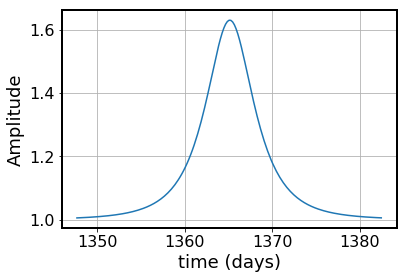

In [8]:
i=0
pt = slicer.slicePoints['peak_time'][i]
ct = slicer.slicePoints['crossing_time'][i]
t = np.arange(pt-ct*4, pt+ct*4, .2)

amp = microlensing_amplification(t, impact_parameter=slicer.slicePoints['impact_parameter'][i],
                                crossing_time=ct,
                                 peak_time=pt)
plt.plot(t, amp)
plt.xlabel('time (days)')
plt.ylabel('Amplitude')